# Decision Trees and Random Forest using LendingClub Data set 

Here are what the columns in the data set represent:

* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* **not.fully.paid**: The quantity of interest for classification - whether the borrower paid back the money in full or not

# Generic Part, common to both decision trees and random forests

# Import Libraries and data set

**Import the usual libraries for pandas and plotting**

In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyforest

In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [4]:
# For supressing unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Get the Data

** Use pandas to read loan_data.csv**

> Our Target Variable is "not.fully.paid". If not fully paid, then value = 1, if fully paid, then value = 0

In [5]:
df = pd.read_csv('loan_data.csv')
df.head()

<IPython.core.display.Javascript object>

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check out the info(), head(), and describe() methods on loans

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
# Example of how we can see the distribution of any variable with multiple classes

print("Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.
1    7710
0    1868
Name: credit.policy, dtype: int64


In [10]:
df.shape

(9578, 14)

### Target / Output Variable

In [11]:
# Distribution of output / target variable by the classes it has (it has 2 classes, 0 and 1)

df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Question : What do you think about the above distribution ?

# Exploratory Data Analysis

### Histogram of FICO scores by credit approval status

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'FICO score')

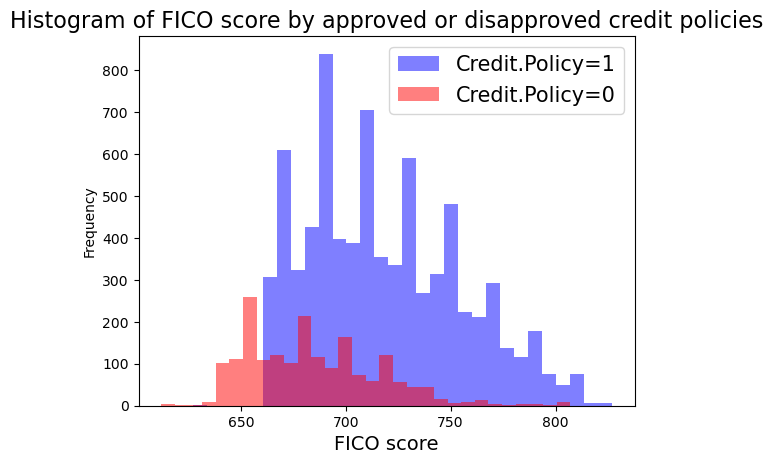

In [12]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue', label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

### Presence or absence of statistical difference of various factors between credit approval status

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Interest rate')

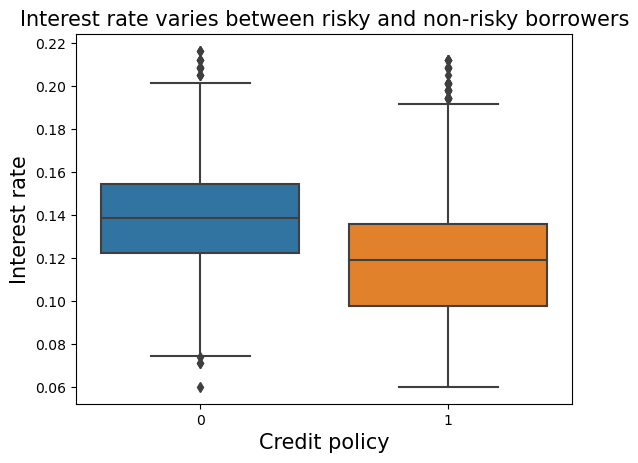

In [13]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Log. annual income')

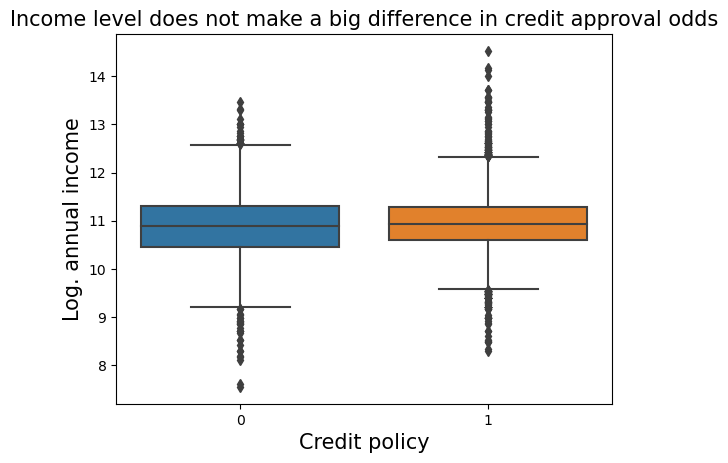

In [14]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Days with credit line')

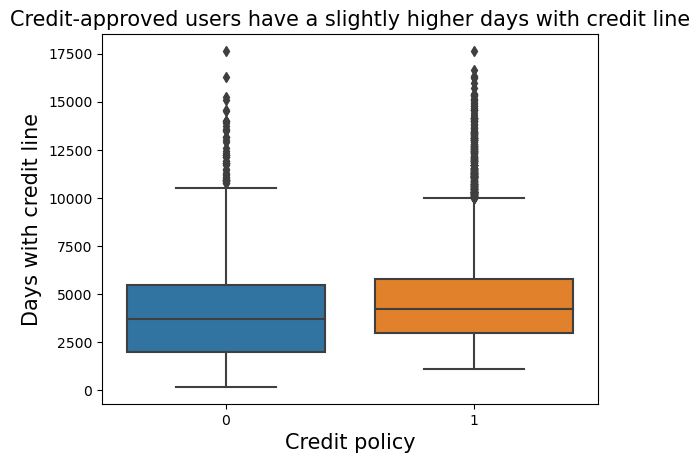

In [15]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Debt-to-income ratio')

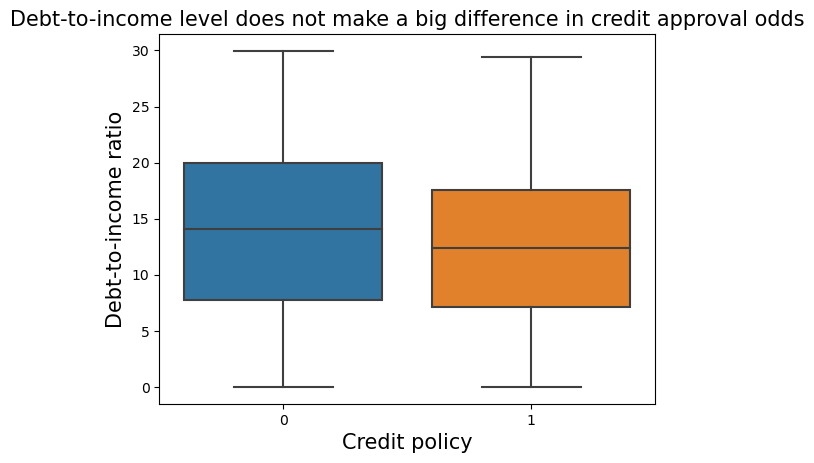

In [16]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

### Countplot of loans by purpose, with the color hue defined by not.fully.paid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Purpose')

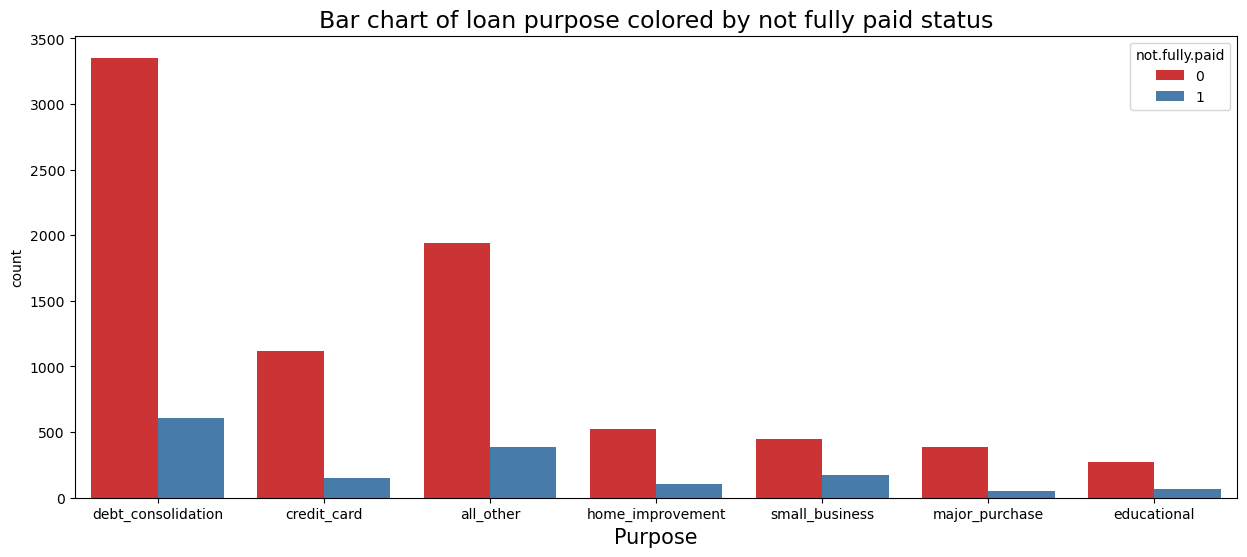

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

In [20]:
df.groupby(['purpose', 'not.fully.paid'])['not.fully.paid'].count()

purpose             not.fully.paid
all_other           0                 1944
                    1                  387
credit_card         0                 1116
                    1                  146
debt_consolidation  0                 3354
                    1                  603
educational         0                  274
                    1                   69
home_improvement    0                  522
                    1                  107
major_purchase      0                  388
                    1                   49
small_business      0                  447
                    1                  172
Name: not.fully.paid, dtype: int64

### Trend between FICO score and interest rate

<IPython.core.display.Javascript object>

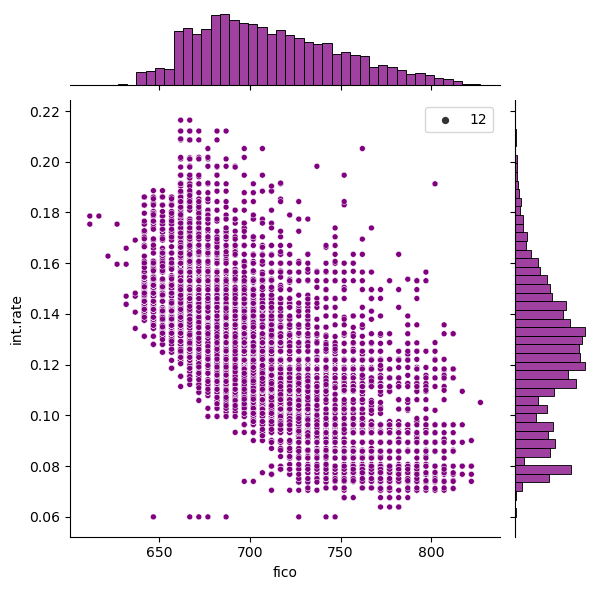

In [21]:
sns.jointplot(x='fico',y='int.rate',data=df, color='purple', size=12)

In [22]:
# Pairplot view
#sns.pairplot(df)
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

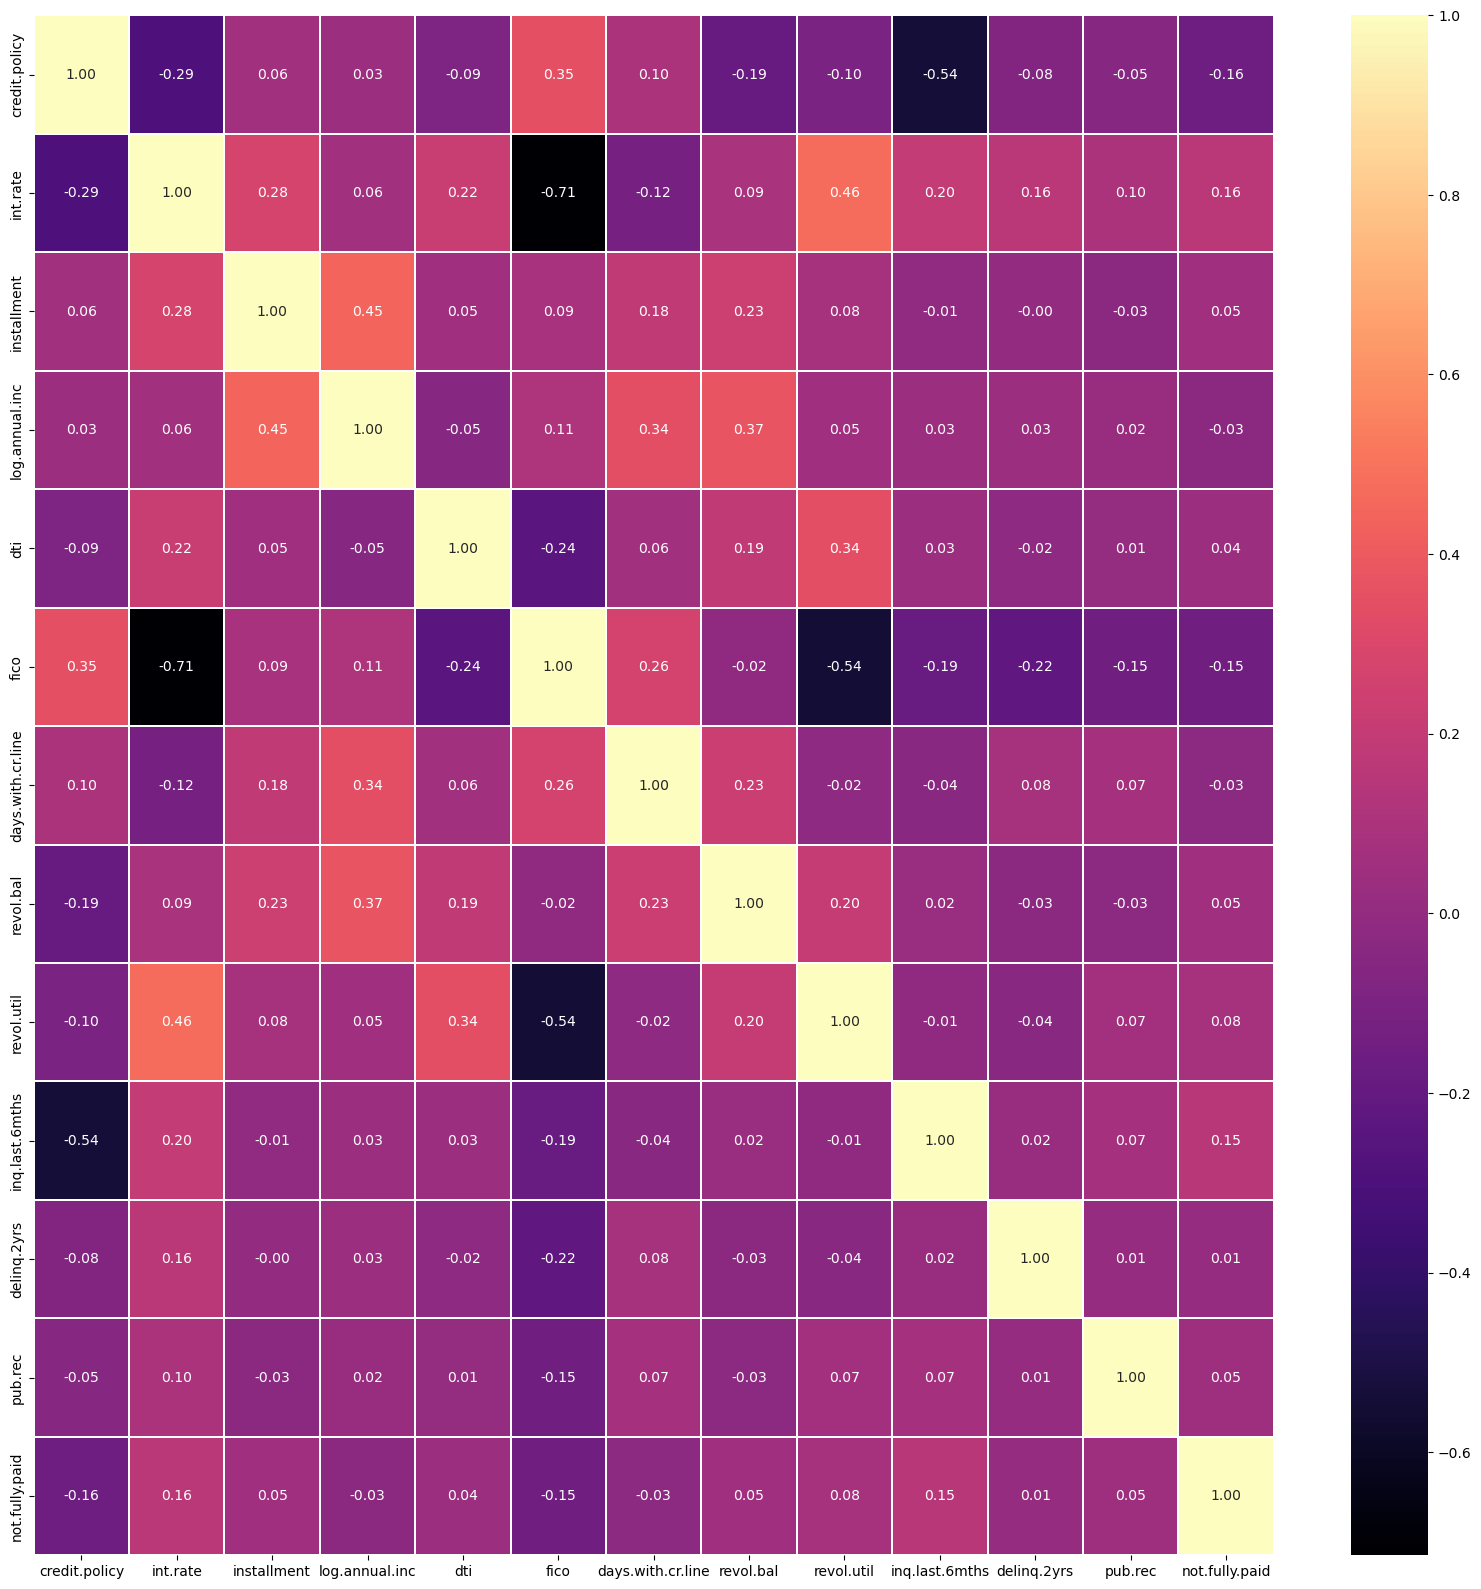

In [23]:
# Correlation matrix view to estimate correlation between variables

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

# Setting up the Data
## Categorical Features

The **purpose** column as categorical. We transform them using dummy variables so sklearn will be able to understand them.

In [24]:
df_final = pd.get_dummies(df,['purpose'],drop_first=False)

<IPython.core.display.Javascript object>

In [25]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [26]:
df.shape

(9578, 14)

In [27]:
df_final.shape

(9578, 20)

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=0)

In [29]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Model 1 : Introduction to Decision Trees

## Training a Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree

DecisionTreeClassifier()

In [33]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [34]:
predictions = dtree.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2012
           1       0.23      0.24      0.24       383

    accuracy                           0.75      2395
   macro avg       0.54      0.54      0.54      2395
weighted avg       0.75      0.75      0.75      2395



In [37]:
# 1st method - Confusion Matrix

cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",100*round((cm[0,0]+cm[1,1])/cm.sum(),3),"%")

[[1702  310]
 [ 290   93]]
Accuracy of prediction: 74.9 %


In [38]:
#2nd Method - Confusion Matrix

pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,0,1,All
Actual,,,
0,1702,310,2012
1,290,93,383
All,1992,403,2395


##### Considering confusion matrix above:

True negative = 1695 (1695 entries out of the 2012 that belongs to Class 0 has been accurately classified as Class 0)

False positive = 317 (317 entries out of the 2012 that belongs to Class 0 has been inaccurately classified as Class 1)

True postive = 102 (102 entries out of the 383 that belongs to Class 1 has been accurately classified as Class 1)

Fasle negative = 281 (233 entries out of the 383 that belongs to  to Class 1 has been inaccurately classified as Class 0)

Accuracy from the confusion matrix can be calculated as : [(True Positive + True Negative)/Number of observations in question] = [(102+1695)/2395] = 0.7503 or 75.1%

In [39]:
# Getting the classification Report 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2012
           1       0.23      0.24      0.24       383

    accuracy                           0.75      2395
   macro avg       0.54      0.54      0.54      2395
weighted avg       0.75      0.75      0.75      2395



Question : Which metric should we consider here ?

##### Note : We can try out different spilts for training vs test (70%-30% or 80%-20% etc), and check its impact on our output parameters.

#####   -------------------------------------------------------------- End of Decision Trees ---------------------------------------------------------------------------------

# Model 2 : Introduction to Random Forests


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()

In [42]:
%%time
rfc.fit(X_train, y_train)

CPU times: total: 1.83 s
Wall time: 2.44 s


RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [43]:
rfc_pred = rfc.predict(X_test)

**Show the Confusion Matrix for the predictions.**

In [44]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction:",100*round((cm[0,0]+cm[1,1])/cm.sum(),3),"%")

[[2001   11]
 [ 375    8]]
Accuracy of prediction: 83.89999999999999 %


## Let us do some basic tuning for our Random Forest model

### Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix

**Criterion 'gini' or 'entropy'**

In [45]:
from tqdm import tqdm_notebook

#### Python trick to monitor the progress using tqdm

In [46]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini',n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

In [47]:
nsimu

21

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

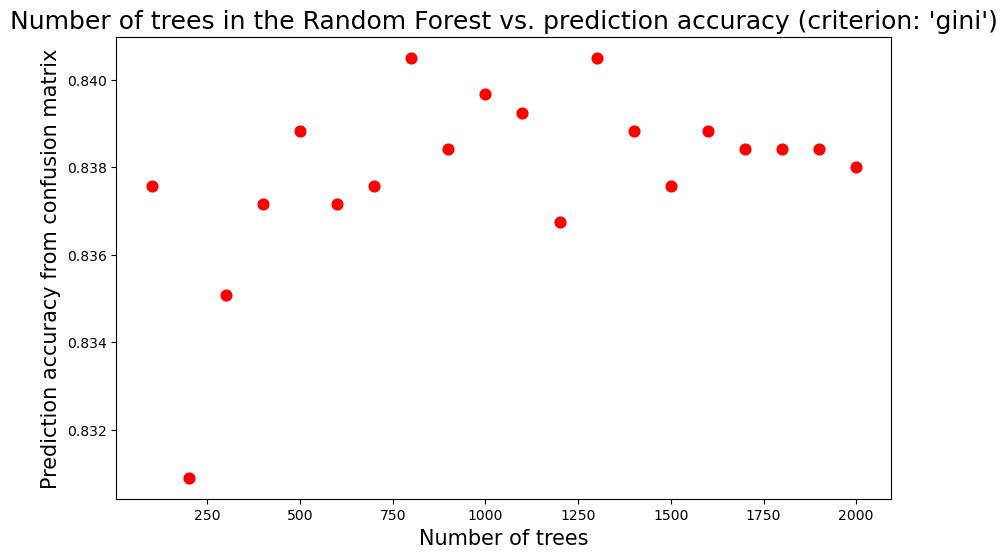

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [49]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='entropy',n_jobs=-1)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

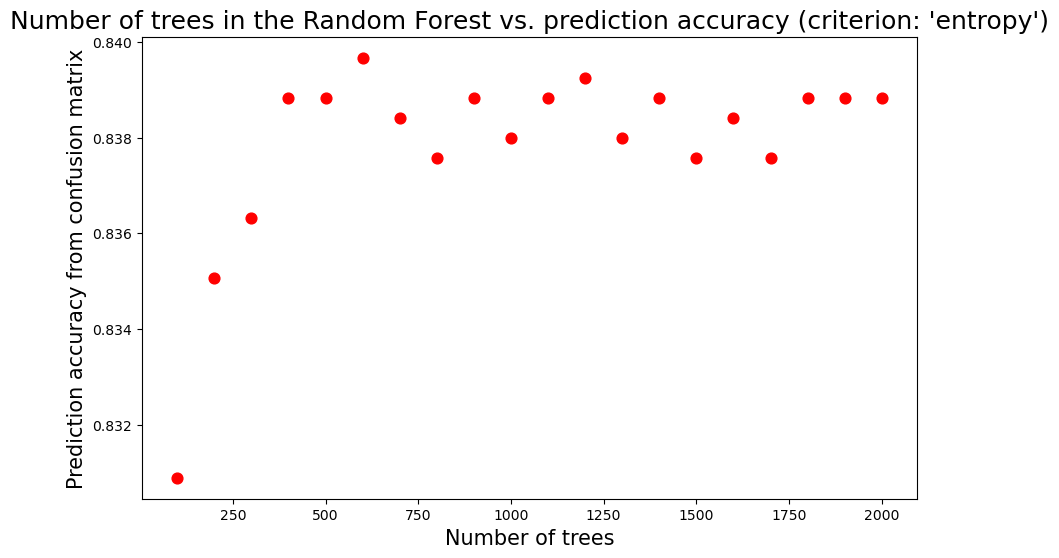

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

**Fixing max tree depth**

In [51]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*100

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

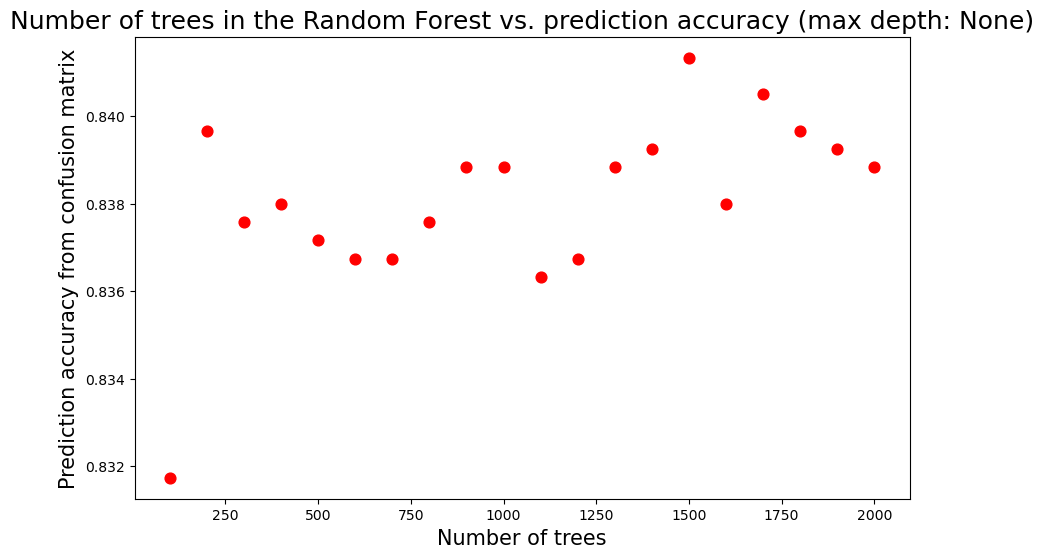

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [53]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in tqdm_notebook(range(1,nsimu)):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

  0%|          | 0/20 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

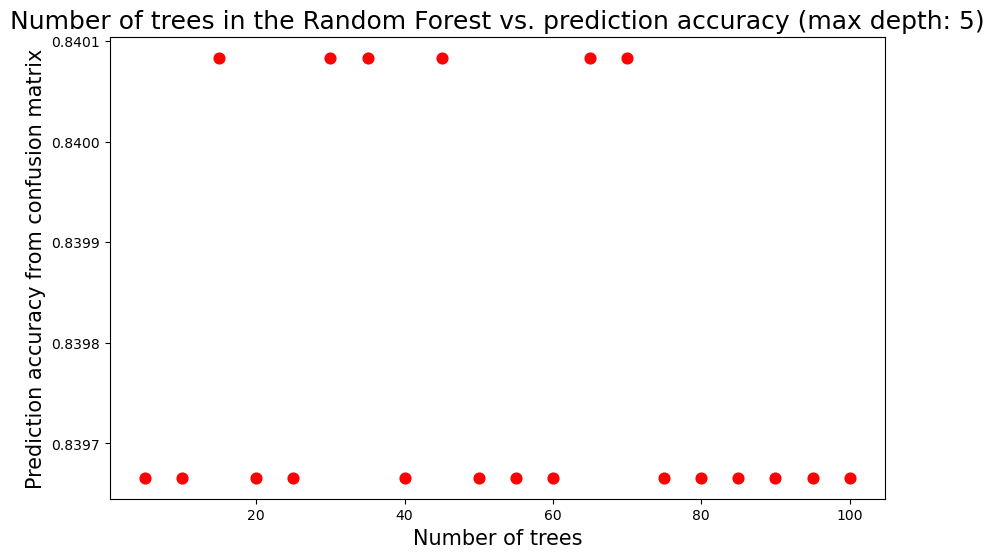

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

**Minimum sample split criteria**

In [55]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

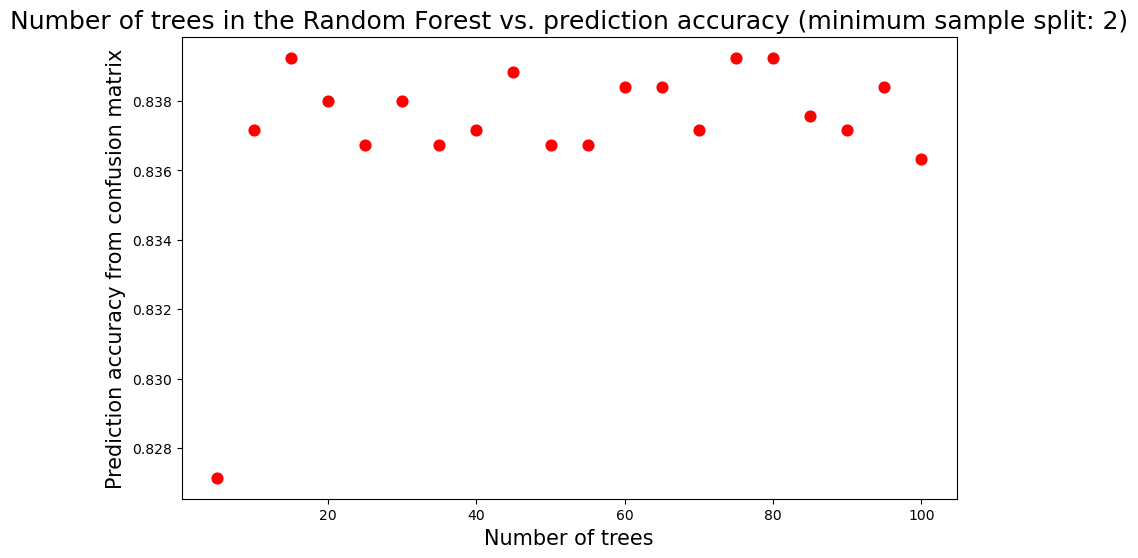

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [57]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*10,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

In [69]:
accuracy

[0,
 0.838830897703549,
 0.8384133611691023,
 0.8375782881002087,
 0.8405010438413362,
 0.8417536534446765,
 0.8392484342379958,
 0.8367432150313152,
 0.8379958246346555,
 0.8379958246346555,
 0.8405010438413362,
 0.8392484342379958,
 0.8400835073068893,
 0.838830897703549,
 0.8384133611691023,
 0.838830897703549,
 0.8400835073068893,
 0.8392484342379958,
 0.838830897703549,
 0.838830897703549,
 0.8392484342379958]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

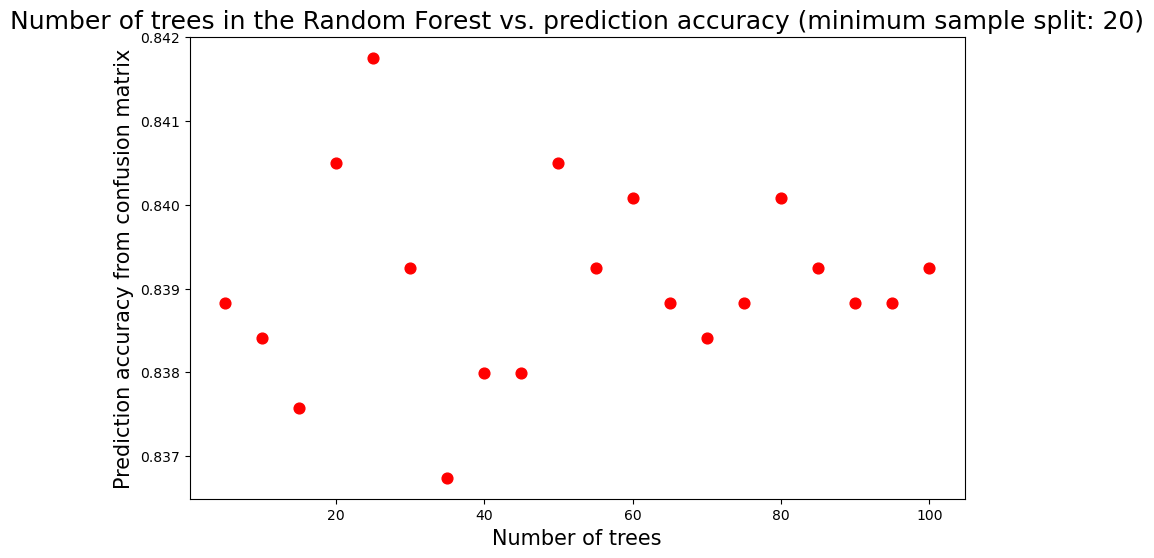

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

**In summary, you can experiment with different parameters together to test if accuracy is going up.**

#####   -------------------------------------------------------------- End of Random Forest ---------------------------------------------------------------------------------

In [70]:
rfc = RandomForestClassifier(n_estimators=50,min_samples_split=20,max_depth=None,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=20, n_estimators=50)

In [71]:


from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", accuracy_score(y_train, y_pred_train))
print("Balanced Accuracy Score: ", balanced_accuracy_score(y_train, y_pred_train))
print("ROC AUC Score", roc_auc_score(y_train, y_pred_train))
print("Precision Score", precision_score(y_train, y_pred_train))
print("Recall Score", recall_score(y_train, y_pred_train))
print("f1-Score", f1_score(y_train, y_pred_train))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))
print("Balanced Accuracy Score: ", balanced_accuracy_score(y_test, y_pred_test))
print("ROC AUC Score", roc_auc_score(y_test, y_pred_test))
print("Precision Score", precision_score(y_test, y_pred_test))
print("Recall Score", recall_score(y_test, y_pred_test))
print("f1-Score", f1_score(y_test, y_pred_test))


===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6033
           1       1.00      0.19      0.32      1150

    accuracy                           0.87      7183
   macro avg       0.93      0.60      0.63      7183
weighted avg       0.89      0.87      0.83      7183

Accuracy Score:  0.8706668522901295
Balanced Accuracy Score:  0.5964388616233902
ROC AUC Score 0.5964388616233902
Precision Score 0.9955156950672646
Recall Score 0.19304347826086957
f1-Score 0.3233794610342316
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.33      0.01      0.03       383

    accuracy                           0.84      2395
   macro avg       0.59      0.50      0.47      2395
weighted avg       0.76      0.84      0.77      2395
